# Detalhes dos Dados

[Fote dos Dados](https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard/data)  
    <sub>* Dados gerados por IA para simular dados reais da Uber India<sub> 


## 🚗 Análise de Corridas da Uber de 2024

<p> Este conjunto de dados contém informações detalhadas sobre as operações de compartilhamento de viagens da <b>UBER</b> no ano de 2024, provendo insights <br> sobre agendamento de corridas, performance veicular, fontes de receitas, comportamentos de cancelamento e métricas de satisfação dos clientes.</p>

## Detalhamento dos Dados

<p>O Conjunto de Dados registra <b>148,770 reservas no total</b>, destrinchando-se em diversos tipos de veículos e fornecendo uma visão completa das operações<br>
de compartilhamento de viagem, incluindo corridas bem sucedidas, cancelamentos, comportamentos dos clientes e métricas financeiras.</p>

## 📋 Tabela de Dados 

| Nome da Coluna Original | Nome da Coluna Traduzida | Descrição |
| :-----------------------|:-------------------------|:----------|
| Date | Data | Data da Reserva|
| Time | Hora | Hora da Reserva|
|Booking ID| ID da Reserva | Identificação unica para cada Reserva |
|Booking Status| Situação da Corrida | Situalção da Corrida (Completa, Cancelada pelo Clientes, Cancelada pelo Motorista, etc..)|
|Customer ID| ID do Cliente | Identificação única do cliente|
|Vehicle Type| Tipo de Veiculo | Tipo do veículo ( Go Mini, Go Sedan, Auto, eBike/Bike, UberXL, Premiere Sedan)|
|Pickup Location| Local de Embarque | Local de início da corrida|
|Drop Location| Local de Desenbarque | Destino final da corrida|
|Avg VTAT| Med TCMLE| Média de Tempo para Chegada do Motorista no Local de Embarque (em minutos)|
|Avg CTAT| Med TCELD| Média de Tempo da Corrida do ponto de Embarque até o Local de Destino (em minutos)|
|Cancelled Rides by Customer| Corridas Canceladas pelo Cliente | Indicador de Corridas Canceladas pelo Cliente |
|Reason for cancelling by Customer| Motivo do Cancelamento do Cliente | Motivo do Cancelamento do cliente|
|Cancelled Rides by Driver| Corridas Canceladas pelo Motorista | Indicador de Corridas canceladas pelo Motorista|
|Driver Cancellation Reason| Motivo do Cancelamento do Motorista| Motivo do Cancelamento do Motorista|
|Incomplete Rides| Corrida Incompleta | Indicador de corrida incompleta|
|Incomplete Rides Reason| Motivo da Corrida Incompleta| Motivo da corrida imcompleta|
|Booking Value| Valor da Reserva | Total do valor cobrado na corrida|
|Ride Distance| Distância da Corrida | Distância percorrida durante a corrida (em KM)|
|Driver Ratings| Avaliação do Motorista | Avaliação do Motorista (1-5 estrelas)|
|Customer Rating| Avaliação do Cliente | Avaliação do Cliente (1-5 estrelas)|
|Payment Method | Método de Pagamento | Método de pagamento utilizado (UPI, Dinheiro, Cartão de Crédito, Cartão de Débito, Carteira Uber)|

- UPI: É um método de pagamento instantâneo desenvolvido na Índia que permite transações bancárias utilizando o celular. Similar ao PIX

# Bibliotecas
<p> Espaço dedicado às bibliotecas utilizadas durante a análise.<p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


pd.set_option('display.max_columns',None)


# Funções 

Espaço dedicado às funções utilizadas durante a análise.

In [2]:
# As etações estão referenciadas ao emisferio Norte.
def atribuir_estação(mes):
    if mes in [12,1,2]:
        return 'Inverno'
    elif mes in [3,4,5]:
        return 'Primavera'
    elif mes in [6,7,8]:
        return 'Verão'
    else:
        return 'Outono'
    



# Carregamento do Conjunto de Dados

In [3]:
df_ub = pd.read_csv('ncr_ride_bookings.csv')

# Tradução das Colunas

In [4]:
dic_tradutor = {
    'Date' : 'Data',
    'Time' : 'Hora',
    'Booking ID' : 'ID da Reserva',
    'Booking Status' : 'Situação da Corrida',
    'Customer ID' : 'ID do Cliente',
    'Vehicle Type' : 'Tipo de Veículo',
    'Pickup Location' : 'Local de Embarque',
    'Drop Location' : 'Local de Desembarque',
    'Avg VTAT' : 'Med TCMLE',
    'Avg CTAT' : 'Med TCELD',
    'Cancelled Rides by Customer' : 'Corridas Canceladas pelo Cliente',
    'Reason for cancelling by Customer' : 'Motivo do Cancelamento do Cliente',
    'Cancelled Rides by Driver' : 'Corridas Canceladas pelo Motorista',
    'Driver Cancellation Reason' : 'Motivo do Cancelamento do Motorista',
    'Incomplete Rides' : 'Corrida Incompleta',
    'Incomplete Rides Reason' : 'Motivo da Corrida Incompleta',
    'Booking Value' : 'Valor da Reserva',
    'Ride Distance' : 'Distância da Corrida',
    'Driver Ratings' : 'Avaliação do Motorista',
    'Customer Rating' : 'Avaliação do Cliente',
    'Payment Method' : 'Método de Pagamento',
}

df_ub_2 = df_ub.copy()

df_ub_2.rename(columns=dic_tradutor,inplace=True)

# Visualização dos Dados Originais

In [5]:
df_ub.head(2).T

,0,1
Date,2024-03-23,2024-11-29
Time,12:29:38,18:01:39
Booking ID,"""CNR5884300""","""CNR1326809"""
Booking Status,No Driver Found,Incomplete
Customer ID,"""CID1982111""","""CID4604802"""
Vehicle Type,eBike,Go Sedan
Pickup Location,Palam Vihar,Shastri Nagar
Drop Location,Jhilmil,Gurgaon Sector 56
Avg VTAT,NaN,4.9
Avg CTAT,NaN,14.0


# Visualização dos Dados Traduzidos

In [6]:
df_ub_2.head(2).T

,0,1
Data,2024-03-23,2024-11-29
Hora,12:29:38,18:01:39
ID da Reserva,"""CNR5884300""","""CNR1326809"""
Situação da Corrida,No Driver Found,Incomplete
ID do Cliente,"""CID1982111""","""CID4604802"""
Tipo de Veículo,eBike,Go Sedan
Local de Embarque,Palam Vihar,Shastri Nagar
Local de Desembarque,Jhilmil,Gurgaon Sector 56
Med TCMLE,NaN,4.9
Med TCELD,NaN,14.0


# Verificação dos Tipos de Dados

In [7]:
df_ub_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Data                                 150000 non-null  object 
 1   Hora                                 150000 non-null  object 
 2   ID da Reserva                        150000 non-null  object 
 3   Situação da Corrida                  150000 non-null  object 
 4   ID do Cliente                        150000 non-null  object 
 5   Tipo de Veículo                      150000 non-null  object 
 6   Local de Embarque                    150000 non-null  object 
 7   Local de Desembarque                 150000 non-null  object 
 8   Med TCMLE                            139500 non-null  float64
 9   Med TCELD                            102000 non-null  float64
 10  Corridas Canceladas pelo Cliente     10500 non-null   float64
 11  Motivo do Can

# Verificação da Quantidade de Valores Nulos

In [8]:
df_ub_2.isnull().sum()

Data                                        0
Hora                                        0
ID da Reserva                               0
Situação da Corrida                         0
ID do Cliente                               0
Tipo de Veículo                             0
Local de Embarque                           0
Local de Desembarque                        0
Med TCMLE                               10500
Med TCELD                               48000
Corridas Canceladas pelo Cliente       139500
Motivo do Cancelamento do Cliente      139500
Corridas Canceladas pelo Motorista     123000
Motivo do Cancelamento do Motorista    123000
Corrida Incompleta                     141000
Motivo da Corrida Incompleta           141000
Valor da Reserva                        48000
Distância da Corrida                    48000
Avaliação do Motorista                  57000
Avaliação do Cliente                    57000
Método de Pagamento                     48000
dtype: int64

# Alteração tipo de Dados

In [9]:
df_ub_2['Data'] = pd.to_datetime(df_ub_2['Data'])
df_ub_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Data                                 150000 non-null  datetime64[ns]
 1   Hora                                 150000 non-null  object        
 2   ID da Reserva                        150000 non-null  object        
 3   Situação da Corrida                  150000 non-null  object        
 4   ID do Cliente                        150000 non-null  object        
 5   Tipo de Veículo                      150000 non-null  object        
 6   Local de Embarque                    150000 non-null  object        
 7   Local de Desembarque                 150000 non-null  object        
 8   Med TCMLE                            139500 non-null  float64       
 9   Med TCELD                            102000 non-null  float64       
 

In [10]:
df_ub_2['Hora_INT'] = pd.to_datetime(df_ub_2['Hora'],format="%H:%M:%S").dt.hour
df_ub_2.head(2).T

,0,1
Data,2024-03-23 00:00:00,2024-11-29 00:00:00
Hora,12:29:38,18:01:39
ID da Reserva,"""CNR5884300""","""CNR1326809"""
Situação da Corrida,No Driver Found,Incomplete
ID do Cliente,"""CID1982111""","""CID4604802"""
Tipo de Veículo,eBike,Go Sedan
Local de Embarque,Palam Vihar,Shastri Nagar
Local de Desembarque,Jhilmil,Gurgaon Sector 56
Med TCMLE,NaN,4.9
Med TCELD,NaN,14.0


## Crianção da Separações entre variáveis numéricas e categoricas

In [11]:
numericas = df_ub_2.select_dtypes(include=['float64'])
categoricas = df_ub_2.select_dtypes(include=['object','category','bool'])

In [12]:
numericas.head(2).T

,0,1
Med TCMLE,NaN,4.90
Med TCELD,NaN,14.00
Corridas Canceladas pelo Cliente,NaN,NaN
Corridas Canceladas pelo Motorista,NaN,NaN
Corrida Incompleta,NaN,1.00
Valor da Reserva,NaN,237.00
Distância da Corrida,NaN,5.73
Avaliação do Motorista,NaN,NaN
Avaliação do Cliente,NaN,NaN


In [13]:
categoricas.head(2).T

,0,1
Hora,12:29:38,18:01:39
ID da Reserva,"""CNR5884300""","""CNR1326809"""
Situação da Corrida,No Driver Found,Incomplete
ID do Cliente,"""CID1982111""","""CID4604802"""
Tipo de Veículo,eBike,Go Sedan
Local de Embarque,Palam Vihar,Shastri Nagar
Local de Desembarque,Jhilmil,Gurgaon Sector 56
Motivo do Cancelamento do Cliente,NaN,NaN
Motivo do Cancelamento do Motorista,NaN,NaN
Motivo da Corrida Incompleta,NaN,Vehicle Breakdown


## Tratamento de valores Nulos Numéricos

### Substituindo os valores Nulos das colunas com indicadores

In [14]:
col = ['Corridas Canceladas pelo Cliente','Corridas Canceladas pelo Motorista','Corrida Incompleta']
for i in col:
    df_ub_2[i] = df_ub_2[i].fillna(0)
    numericas[i] = numericas[i].fillna(0)

### Substituindo os valores Nulos da Distância da Corrida e Valor da Reserva

In [15]:
df_ub_2['Valor da Reserva'] = df_ub_2['Valor da Reserva'].fillna(df_ub_2['Valor da Reserva'].median())
df_ub_2['Distância da Corrida'] = df_ub_2['Distância da Corrida'].fillna(df_ub_2['Distância da Corrida'].median())

## Tratamento de Valores Nulos Categoricos

In [16]:

df_ub_2['Método de Pagamento'] = df_ub_2['Método de Pagamento'].fillna('Não informado')


In [17]:
df_ub_2.head(2).T

,0,1
Data,2024-03-23 00:00:00,2024-11-29 00:00:00
Hora,12:29:38,18:01:39
ID da Reserva,"""CNR5884300""","""CNR1326809"""
Situação da Corrida,No Driver Found,Incomplete
ID do Cliente,"""CID1982111""","""CID4604802"""
Tipo de Veículo,eBike,Go Sedan
Local de Embarque,Palam Vihar,Shastri Nagar
Local de Desembarque,Jhilmil,Gurgaon Sector 56
Med TCMLE,NaN,4.9
Med TCELD,NaN,14.0


In [18]:
df_ub_2.isnull().sum()

Data                                        0
Hora                                        0
ID da Reserva                               0
Situação da Corrida                         0
ID do Cliente                               0
Tipo de Veículo                             0
Local de Embarque                           0
Local de Desembarque                        0
Med TCMLE                               10500
Med TCELD                               48000
Corridas Canceladas pelo Cliente            0
Motivo do Cancelamento do Cliente      139500
Corridas Canceladas pelo Motorista          0
Motivo do Cancelamento do Motorista    123000
Corrida Incompleta                          0
Motivo da Corrida Incompleta           141000
Valor da Reserva                            0
Distância da Corrida                        0
Avaliação do Motorista                  57000
Avaliação do Cliente                    57000
Método de Pagamento                         0
Hora_INT                          

# Criando coluna Ano, Num_Mes, Dia, Dia_Semana

In [19]:
df_ub_2['Ano'] = df_ub_2['Data'].dt.year
df_ub_2['Mes'] = df_ub_2['Data'].dt.month
df_ub_2['Dia'] = df_ub_2['Data'].dt.day
df_ub_2['DOW'] = df_ub_2['Data'].dt.day_of_week
df_ub_2['Dia_Semana'] = df_ub_2['Data'].dt.day_name()
df_ub_2['Nome_Mes'] = df_ub_2['Data'].dt.month_name()
df_ub_2['Trimestre'] = df_ub_2['Data'].dt.quarter


## Criando coluna das estações

In [20]:
df_ub_2['Estacao'] = df_ub_2['Mes'].apply(atribuir_estação)

# Descrição dos Dados

## Descrição dos dados Numéricos

In [21]:
df_ub_2.describe().T

,count,mean,min,25%,50%,75%,max,std
Data,150000,2024-06-30 16:42:40.320000,2024-01-01 00:00:00,2024-03-31 00:00:00,2024-07-01 00:00:00,2024-09-30 00:00:00,2024-12-30 00:00:00,NaN
Med TCMLE,139500.0,8.456352,2.0,5.3,8.3,11.3,20.0,3.773564
Med TCELD,102000.0,29.149636,10.0,21.6,28.8,36.8,45.0,8.902577
Corridas Canceladas pelo Cliente,150000.0,0.07,0.0,0.0,0.0,0.0,1.0,0.255148
Corridas Canceladas pelo Motorista,150000.0,0.18,0.0,0.0,0.0,0.0,1.0,0.384189
Corrida Incompleta,150000.0,0.06,0.0,0.0,0.0,0.0,1.0,0.237488
Valor da Reserva,150000.0,478.12122,50.0,319.75,414.0,521.0,4277.0,329.339976
Distância da Corrida,150000.0,24.343568,1.0,17.36,23.72,30.65,50.0,11.554362
Avaliação do Motorista,93000.0,4.230992,3.0,4.1,4.3,4.6,5.0,0.436871
Avaliação do Cliente,93000.0,4.404584,3.0,4.2,4.5,4.8,5.0,0.437819


## Descrição das Variáveis Categoricas

In [22]:
df_ub_2.describe(include=object).T

,count,unique,top,freq
Hora,150000,62910,17:44:57,16
ID da Reserva,150000,148767,"""CNR3648267""",3
Situação da Corrida,150000,5,Completed,93000
ID do Cliente,150000,148788,"""CID6715450""",3
Tipo de Veículo,150000,7,Auto,37419
Local de Embarque,150000,176,Khandsa,949
Local de Desembarque,150000,176,Ashram,936
Motivo do Cancelamento do Cliente,10500,5,Wrong Address,2362
Motivo do Cancelamento do Motorista,27000,4,Customer related issue,6837
Motivo da Corrida Incompleta,9000,3,Customer Demand,3040


# Perguntas de Negócio

In [23]:
df_ub_2.head(2).T

,0,1
Data,2024-03-23 00:00:00,2024-11-29 00:00:00
Hora,12:29:38,18:01:39
ID da Reserva,"""CNR5884300""","""CNR1326809"""
Situação da Corrida,No Driver Found,Incomplete
ID do Cliente,"""CID1982111""","""CID4604802"""
Tipo de Veículo,eBike,Go Sedan
Local de Embarque,Palam Vihar,Shastri Nagar
Local de Desembarque,Jhilmil,Gurgaon Sector 56
Med TCMLE,NaN,4.9
Med TCELD,NaN,14.0


##  1. Exploração Inicial

### Análise: DATA

In [24]:
df_ub_2['Mes'].value_counts(normalize=True) 

Mes
7     0.085980
1     0.085740
5     0.085187
3     0.084793
10    0.084340
8     0.084240
6     0.082933
11    0.082627
12    0.081667
9     0.081653
4     0.081327
2     0.079513
Name: proportion, dtype: float64

In [25]:
df_ub_2['Estacao'].value_counts(normalize=True) 

Estacao
Verão        0.253153
Primavera    0.251307
Outono       0.248620
Inverno      0.246920
Name: proportion, dtype: float64

### Análise: Situação da Corrida

In [26]:
df_ub_2['Situação da Corrida'].value_counts(normalize=True)

Situação da Corrida
Completed                0.62
Cancelled by Driver      0.18
No Driver Found          0.07
Cancelled by Customer    0.07
Incomplete               0.06
Name: proportion, dtype: float64

### Análise: Tipo de Veículo

In [27]:
df_ub_2['Tipo de Veículo'].value_counts(normalize=True)

Tipo de Veículo
Auto             0.249460
Go Mini          0.198707
Go Sedan         0.180940
Bike             0.150113
Premier Sedan    0.120740
eBike            0.070380
Uber XL          0.029660
Name: proportion, dtype: float64

### Análise: Local de Embarque

In [28]:
df_ub_2['Local de Embarque'].value_counts(normalize=True)

Local de Embarque
Khandsa             0.006327
Barakhamba Road     0.006307
Saket               0.006207
Badarpur            0.006140
Pragati Maidan      0.006133
                      ...   
Mandi House         0.005333
Noida Sector 18     0.005327
Laxmi Nagar         0.005313
Ashok Vihar         0.005307
Ghitorni Village    0.005267
Name: proportion, Length: 176, dtype: float64

### Análise: Local de Desembarque

In [29]:
df_ub_2['Local de Desembarque'].value_counts(normalize=True)

Local de Desembarque
Ashram              0.006240
Basai Dhankot       0.006113
Lok Kalyan Marg     0.006107
Narsinghpur         0.006087
Cyber Hub           0.006080
                      ...   
MG Road             0.005327
Bhiwadi             0.005280
Shivaji Park        0.005240
Anand Vihar ISBT    0.005227
Huda City Centre    0.005160
Name: proportion, Length: 176, dtype: float64

### Análise: Med TCMLE

In [30]:
df_ub_2['Med TCMLE'].describe()

count    139500.000000
mean          8.456352
std           3.773564
min           2.000000
25%           5.300000
50%           8.300000
75%          11.300000
max          20.000000
Name: Med TCMLE, dtype: float64

### Análise: Med TCELD

In [31]:
df_ub_2['Med TCELD'].describe()

count    102000.000000
mean         29.149636
std           8.902577
min          10.000000
25%          21.600000
50%          28.800000
75%          36.800000
max          45.000000
Name: Med TCELD, dtype: float64

### Análise: Corridas Canceladas pelo Cliente

In [32]:
df_ub_2['Corridas Canceladas pelo Cliente'].mean()

np.float64(0.07)

In [33]:
df_ub_2['Motivo do Cancelamento do Cliente'].value_counts(normalize=True)

Motivo do Cancelamento do Cliente
Wrong Address                                   0.224952
Change of plans                                 0.224095
Driver is not moving towards pickup location    0.222381
Driver asked to cancel                          0.218571
AC is not working                               0.110000
Name: proportion, dtype: float64

### Análise: Corridas Canceladas pelo Motorista

In [34]:
df_ub_2['Corridas Canceladas pelo Motorista'].value_counts()

Corridas Canceladas pelo Motorista
0.0    123000
1.0     27000
Name: count, dtype: int64

In [35]:
df_ub_2['Motivo do Cancelamento do Motorista'].value_counts(normalize=True)

Motivo do Cancelamento do Motorista
Customer related issue                 0.253222
The customer was coughing/sick         0.250037
Personal & Car related issues          0.249111
More than permitted people in there    0.247630
Name: proportion, dtype: float64

### Análise: Corrida Incompleta

In [36]:
df_ub_2['Corrida Incompleta'].mean()

np.float64(0.06)

In [37]:
df_ub_2['Motivo da Corrida Incompleta'].value_counts(normalize=True)

Motivo da Corrida Incompleta
Customer Demand      0.337778
Vehicle Breakdown    0.334667
Other Issue          0.327556
Name: proportion, dtype: float64

### Análise: Valor da Reserva

In [38]:
df_ub_2['Valor da Reserva'].describe()

count    150000.000000
mean        478.121220
std         329.339976
min          50.000000
25%         319.750000
50%         414.000000
75%         521.000000
max        4277.000000
Name: Valor da Reserva, dtype: float64

### Análise: Distância da Corrida

In [39]:
df_ub_2['Distância da Corrida'].describe()

count    150000.000000
mean         24.343568
std          11.554362
min           1.000000
25%          17.360000
50%          23.720000
75%          30.650000
max          50.000000
Name: Distância da Corrida, dtype: float64

### Análise: Avaliação do Motorista

In [40]:
df_ub_2['Avaliação do Motorista'].describe()

count    93000.000000
mean         4.230992
std          0.436871
min          3.000000
25%          4.100000
50%          4.300000
75%          4.600000
max          5.000000
Name: Avaliação do Motorista, dtype: float64

### Análise: Avaliação do Cliente

In [41]:
df_ub_2['Avaliação do Cliente'].describe()

count    93000.000000
mean         4.404584
std          0.437819
min          3.000000
25%          4.200000
50%          4.500000
75%          4.800000
max          5.000000
Name: Avaliação do Cliente, dtype: float64

### Análise: Método de Pagamento

In [42]:
df_ub_2['Método de Pagamento'].value_counts(normalize=True)

Método de Pagamento
Não informado    0.320000
UPI              0.306060
Cash             0.169113
Uber Wallet      0.081840
Credit Card      0.068060
Debit Card       0.054927
Name: proportion, dtype: float64

## 2. Exportação dos dados tratados

In [43]:
df_ub_2.to_csv('uber_tratado.csv',index=False)

## 3. Perguntas

### 1) Perfil de Cancelamento
- Quem tem a maior taxa de cancelamento (Motoristas x Clientes) ?
- Existe alguma correlação entre os dias da semana e o percentual de cancelamento ?
- Existe alguma correlação entre as horas do dia e o percentual de cancelamento ?
- Existe algum impacto financeiro relevante atrelado aos cancelamentos ?


A taxa de cancelamento é : 25.00%
Proporção de cancelamento pelo Motorista 72.00%
Proporção de cancelamento pelo Motorista 28.00%


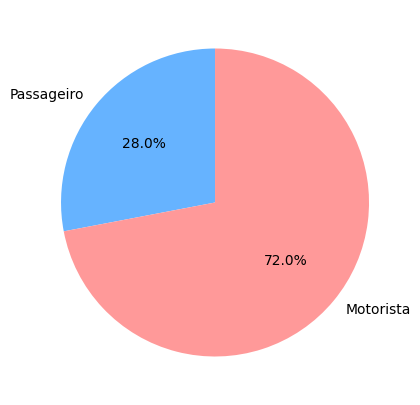

In [44]:
taxa_cancelamento = (df_ub_2['Corridas Canceladas pelo Cliente'].mean() + df_ub_2['Corridas Canceladas pelo Motorista'].mean())
cancel_motorisata = df_ub_2['Corridas Canceladas pelo Motorista'].mean()
cancel_passageiro = df_ub_2['Corridas Canceladas pelo Cliente'].mean()
print(f'A taxa de cancelamento é : {taxa_cancelamento * 100 :.2f}%')
print(f'Proporção de cancelamento pelo Motorista {(cancel_motorisata/ taxa_cancelamento) * 100 :.2f}%')
print(f'Proporção de cancelamento pelo Motorista {(cancel_passageiro/ taxa_cancelamento) * 100 :.2f}%')
plt.figure(figsize=(10,5))
plt.pie([cancel_passageiro,cancel_motorisata],labels=['Passageiro','Motorista'],autopct='%1.1f%%',startangle=90,colors=['#66b3ff', '#ff9999'])
plt.show()

In [45]:
#Total de cancelamentos. 
total_cacelado = (
    df_ub_2.groupby('Dia_Semana')[['Corridas Canceladas pelo Cliente','Corridas Canceladas pelo Motorista']].sum().reset_index()
)

ordem_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

total_cacelado['Dia_Semana'] = pd.Categorical(total_cacelado["Dia_Semana"],categories=ordem_dias,ordered=True)

total_cacelado['Total'] = total_cacelado['Corridas Canceladas pelo Cliente'] + total_cacelado['Corridas Canceladas pelo Motorista']
total_cacelado = total_cacelado.sort_values('Dia_Semana')


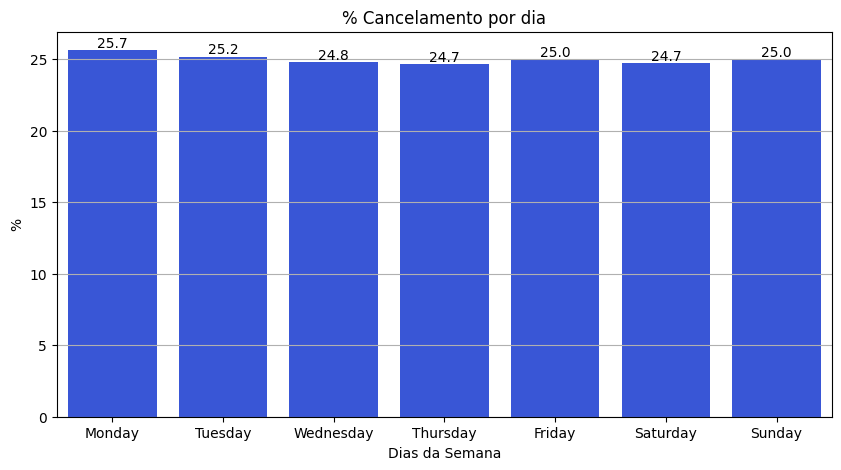

In [46]:
d_demanda = df_ub_2.groupby('Dia_Semana')['ID da Reserva'].count().reindex(ordem_dias)

total_cacelado['%'] = (total_cacelado['Total'] / d_demanda.values) * 100

plt.figure(figsize=(10,5))
ax = sb.barplot(x='Dia_Semana',y='%',data=total_cacelado,color= "#1f45f0")
ax.bar_label(ax.containers[0], labels=total_cacelado['%'].round(1),)
plt.title('% Cancelamento por dia')
plt.xlabel('Dias da Semana')
plt.grid(axis='y')
plt.show()


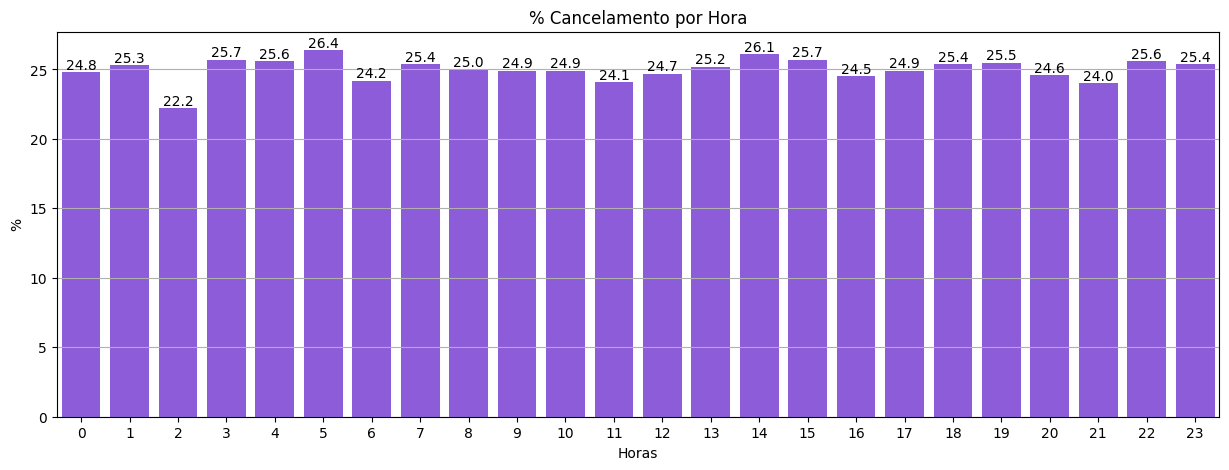

In [47]:
h_demanda = df_ub_2.groupby('Hora_INT')['ID da Reserva'].count().reindex(np.sort(df_ub_2['Hora_INT'].unique()))

total_cacelado_hora =(
    df_ub_2.groupby('Hora_INT')[['Corridas Canceladas pelo Cliente','Corridas Canceladas pelo Motorista']].sum().reset_index()
)

total_cacelado_hora['Total'] = total_cacelado_hora['Corridas Canceladas pelo Cliente'] + total_cacelado_hora['Corridas Canceladas pelo Motorista']
total_cacelado_hora['%'] = ((total_cacelado_hora['Total'] / h_demanda.values) * 100).round(1)

plt.figure(figsize=(15,5))
hplt = sb.barplot(x='Hora_INT',y='%',data=total_cacelado_hora,color="#8747ee")
hplt.bar_label(hplt.containers[0],labels=total_cacelado_hora['%'])
plt.xlabel('Horas')
plt.ylabel('%')
plt.grid(axis='y')
plt.title('% Cancelamento por Hora')
plt.show()

*Notas dos Gráficos*
- Não houve variação significativa na taxa de cancelamento no decorrer da horas do dia e dias da semana.

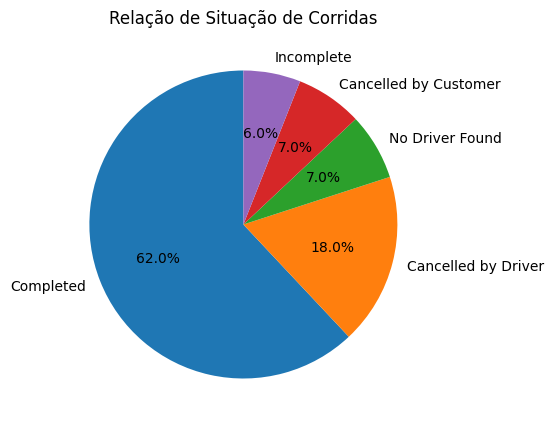

In [48]:
situ_corridas = df_ub_2['Situação da Corrida'].value_counts(dropna=True).reset_index()
situ_corridas['%'] = situ_corridas['count'] / situ_corridas['count'].sum()

plt.figure(figsize=(15,5))
plt.pie(situ_corridas['count'],labels=situ_corridas['Situação da Corrida'],autopct='%1.1f%%',startangle=90)
plt.title('Relação de Situação de Corridas')
plt.show()

*Nota do Gráfico*

- Pode-se verificar que, apesar de a maior parte das corridas serem completadas, há uma elevada taxa de cancelamente, principalmente quando se verifica a taxa de cancelamento pelo motorista
- Somanto todos os cancelamentos eles representam 32% de todas as corridas registradas.

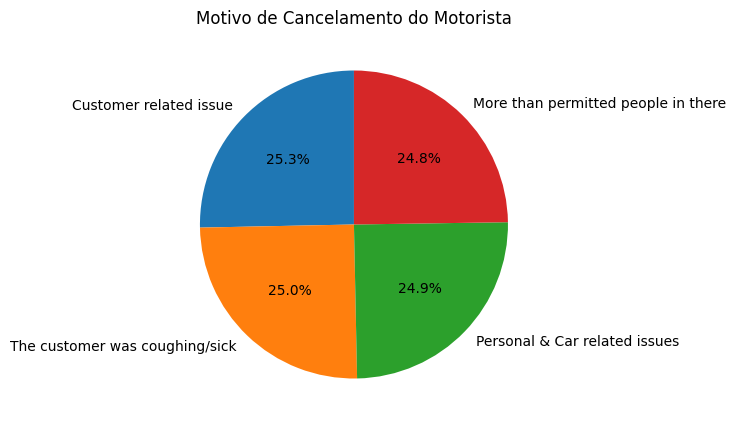

In [49]:
mot_motorista =(
    df_ub_2[df_ub_2['Situação da Corrida'] == 'Cancelled by Driver']['Motivo do Cancelamento do Motorista'].value_counts(dropna=True)
)

plt.figure(figsize=(15,5))
plt.pie(mot_motorista,labels=mot_motorista.index,autopct='%1.1f%%',startangle=90)
plt.title('Motivo de Cancelamento do Motorista')
plt.show()

*Notas do Gráfico*
<p>Os motivos de cancelamento possuem valores muito semelhantes. Isso pode implicar em uma prática abusiva já analisada no Brasil,<br>
em que os motoristas de aplicativo cancelam as corridas de forma abusiva e/ou estratégica, visando aumento na tarifa.<p>

- Estes comportamentos precisam ser tratados na região. 
- Um exemplo de como coibir essa atitude pode ser o método utilizado pela UBER Brasil, que, ao observar o comportamento dos motoristas, realiza o banimento da plataforma caso as atitudes sejam consideradas abusivas e recorrentes.

    - [Fonte 1 - Catraca Livre](https://catracalivre.com.br/variedades/motoristas-da-uber-podem-ser-expulsos-da-plataforma-por-causa-disso)

    - [Fonte 2 - Diário do Comércio](https://diariodocomercio.com.br/mix/motoristas-da-uber-sao-avisados-sobre-possivel-exclusao-da-plataforma)

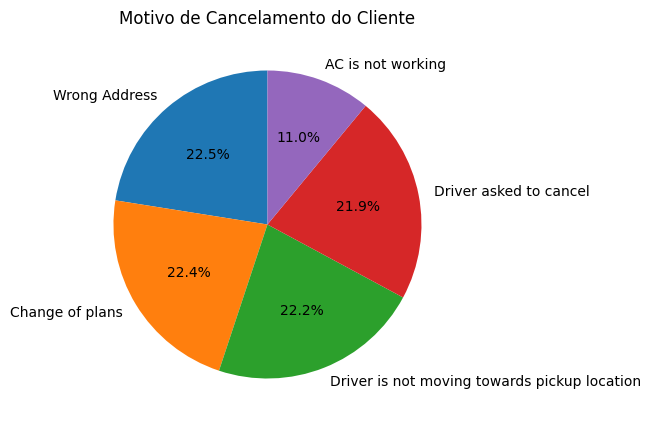

In [50]:
mot_cliente =(
    df_ub_2[df_ub_2['Situação da Corrida'] == 'Cancelled by Customer']['Motivo do Cancelamento do Cliente'].value_counts(dropna=True)
)

plt.figure(figsize=(20,5))
plt.pie(mot_cliente,labels=mot_cliente.index,autopct='%1.1f%%',startangle=90)
plt.title('Motivo de Cancelamento do Cliente')
plt.show()

*Notas do Gráfico*
<p>Tendo em vista os cancelamentos abusivos apontados no gráfico acima e o fato de que 22,2% dos motivos de cancelamento dos clientes são devido ao motorista não estar se movendo em sua direção, isso pode se correlacionar com o comportamento abusivo de alguns motoristas, o que pode prejudicar a experiência dos clientes com a plataforma.<p>


In [51]:
esploratorio = df_ub_2.groupby('Situação da Corrida')['Valor da Reserva'].sum().reset_index()

esploratorio

,Situação da Corrida,Valor da Reserva
0,Cancelled by Customer,4347000.0
1,Cancelled by Driver,11178000.0
2,Completed,47260574.0
3,Incomplete,4585609.0
4,No Driver Found,4347000.0


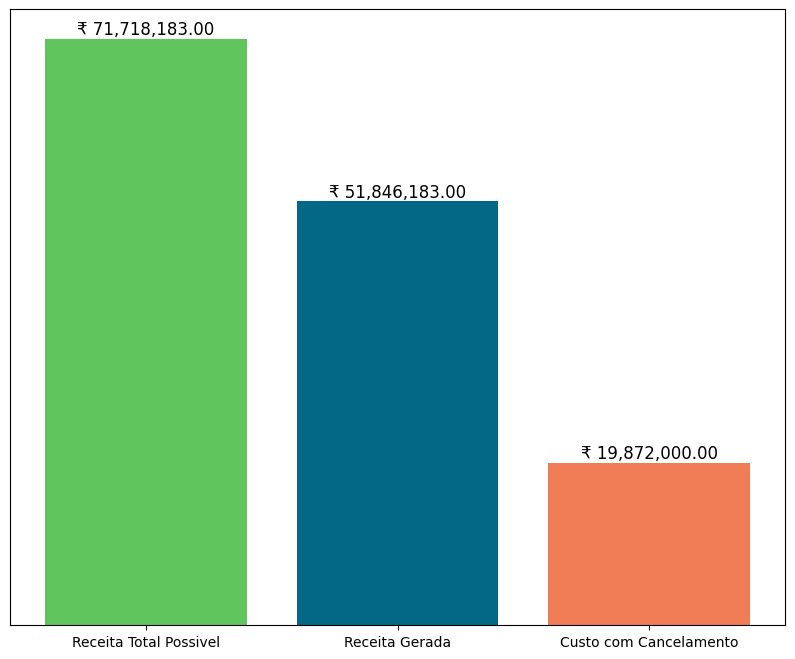

In [52]:
receita_cor_concluidas = df_ub_2[df_ub_2['Situação da Corrida'].isin(['Completed','Incomplete']) ]['Valor da Reserva'].sum()
receita_perdida = df_ub_2[~df_ub_2['Situação da Corrida'].isin(['Completed','Incomplete'])]['Valor da Reserva'].sum()

receita = pd.DataFrame({
    'Tipo' : ['Receita Gerada','Custo com Cancelamento','Receita Total Possivel'],
    'Valor' : [receita_cor_concluidas,receita_perdida,receita_cor_concluidas + receita_perdida]
})

receita['Monetario'] = receita['Valor'].apply(lambda x: f'₹ {x:,.2f}')
receita['%'] = receita['Valor'] / (receita_cor_concluidas + receita_perdida)

receita = receita.sort_values(by=['Valor'],ascending=False)

cores = receita['Tipo'].map({
    'Receita Total Possivel': '#4ABE46E1',
    'Receita Gerada' : "#036885",
    'Custo com Cancelamento' : '#f07d56'
})

plt.figure(figsize=(10,8))
rec_barras = plt.bar(receita['Tipo'],receita['Valor'],color=cores)

for rec_barras, label in zip(rec_barras,receita['Monetario']):
    plt.text(rec_barras.get_x() + rec_barras.get_width()/2, rec_barras.get_height(),label,ha='center',va='bottom',fontsize=12)

plt.ylabel('')
plt.xlabel('')
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()


*Notas do Gráfico*

- A Receita Gerada é o total gerado no somatório entre as corridas completadas e as corridas interrompidas
    - As corridas interrompidas foram consideradas neste cálculo, pois mesmo interrompidas, há um valor a ser pago pela distância percorrida
- O Custo com Cancelamento é o valor que foi deixado de ser gerado considerando todas as corridas canceladas e com motoristas não encontrados
- A Receita Total Possivel é o somatório **Receita Gerada** e **Custo com Cancelamento**, representando o valor total que poderia ser gerado caso não houvesse cancelamentos
- Observando o **Custo com o Cancelamento**, podemos verificar que ele representa **27%** da Receita Total Possivel.

#### Conclusão

Os cancelamentos de corridas na região analisada estão gerando uma perda estimada de **27%** na receita operacional local. A elevada taxa de cancelamentos, atribuída a possíveis práticas abusivas por parte de determinados motoristas da comunidade, demanda uma intervenção corretiva imediata.

Conforme apontado na análise de _Perfil de Cancelamentos_, **72%** de todas as corridas canceladas foram pelos próprios motoristas, sugerindo um padrão sistemático que pode configurar um comportamento oportunista. Este cenário está associado a um impacto financeiro direto de aproximadamente **₹ 14.307.840,00** , equivalente a **R$ 850.470,40** , representando um risco significativo à sustentabilidade da operação na região.



### 2) Performance Veicular
- Quais os Tipos de Veículos mais populares ?
- Quais os Tipos de Veículos apresentam maior rendimento ?


### Breve explicação dos Veículos

|**Tipo de veículo**|**Descrição**|
|:------------------|:------------|
|Auto|Rickshaws motorizado, destinados a corridas curtas e econômicas|
|Moto|Serviço de transporte por Motos|
|Go Mini|Categoria ecônomica de carros compactos|
|Go Sedan|Categoria de carros Sedãs|
|Premier Sedan|Categoria de carros Sedãs de mais alto padrão|
|Uber XL| SUVs e Minivans para grandes grupos e ou grande volume de bagagem|
|eBike| Bicicletas elétricas para aluguel|
|Bike| Motocicletas, utilizadas para deslocamento urbano com agilidade|


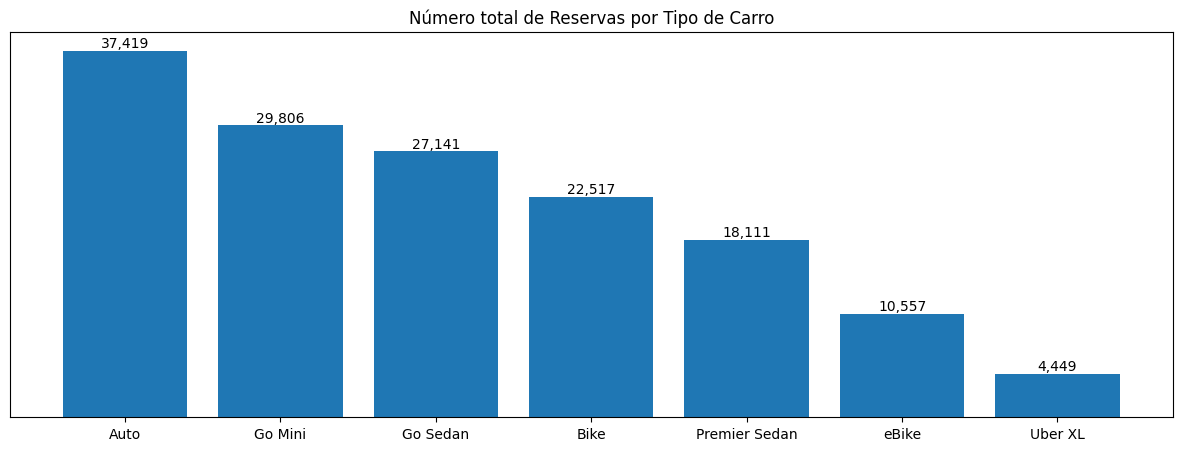

In [53]:
tipo_carros = df_ub_2['Tipo de Veículo'].value_counts().reset_index()

plt.figure(figsize=(15,5))
barras = plt.bar(tipo_carros['Tipo de Veículo'],tipo_carros['count'])

for barr in barras:
    altura = barr.get_height()
    plt.text(barr.get_x() + barr.get_width() / 2,
            altura,
            f'{altura:,.0f}',
            ha='center',
            va='bottom'
    )
plt.title('Número total de Reservas por Tipo de Carro')
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()


In [54]:
distVal_tipo = df_ub_2.groupby('Tipo de Veículo')[['Distância da Corrida','Valor da Reserva']].mean().sort_values(by='Distância da Corrida',ascending=False).reset_index()
distVal_tipo['Valor(Rupias) / km'] = distVal_tipo['Valor da Reserva'] / distVal_tipo['Distância da Corrida']
distVal_tipo


,Tipo de Veículo,Distância da Corrida,Valor da Reserva,Valor(Rupias) / km
0,eBike,24.584152,475.149095,19.327455
1,Bike,24.354174,479.631700,19.694025
2,Go Mini,24.329492,478.007247,19.647235
3,Auto,24.328561,476.979021,19.605723
4,Go Sedan,24.320223,479.806971,19.728724
5,Premier Sedan,24.317667,478.983822,19.696948
6,Uber XL,24.187388,474.103844,19.601283


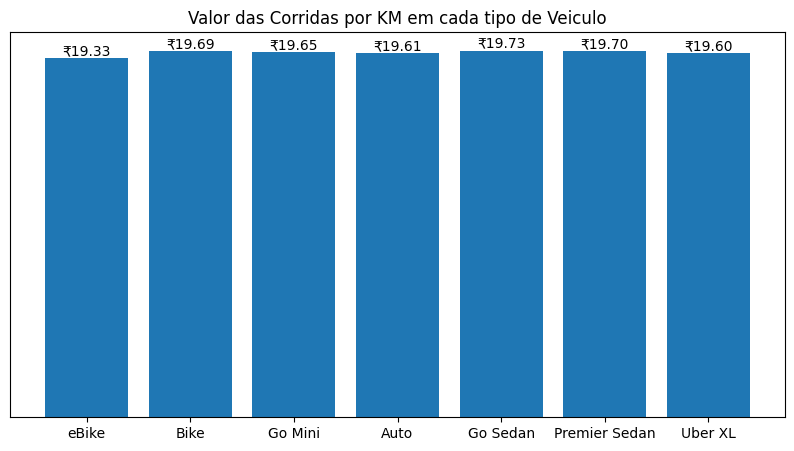

In [55]:
plt.figure(figsize=(10,5))

distVal_tipo_bar = plt.bar(distVal_tipo["Tipo de Veículo"],distVal_tipo["Valor(Rupias) / km"])
for barra in distVal_tipo_bar:
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2,
                altura,
                f'₹{altura:,.2f}',
                ha='center',
                va='bottom'
        )
plt.title('Valor das Corridas por KM em cada tipo de Veiculo')
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()


In [56]:
ava_veiculo = (
    df_ub_2.groupby('Tipo de Veículo')[['Avaliação do Motorista','Avaliação do Cliente']].mean().sort_values(by='Avaliação do Motorista',ascending=False).reset_index()
    )
ava_veiculo['Avaliação do Cliente']=ava_veiculo['Avaliação do Cliente'].round(2)
ava_veiculo['Avaliação do Motorista']=ava_veiculo['Avaliação do Motorista'].round(2)

ava_veiculo.T

,0,1,2,3,4,5,6
Tipo de Veículo,Uber XL,Premier Sedan,Auto,Go Sedan,Bike,Go Mini,eBike
Avaliação do Motorista,4.24,4.23,4.23,4.23,4.23,4.23,4.23
Avaliação do Cliente,4.4,4.4,4.4,4.41,4.4,4.4,4.4


*Nota dos Gráficos*

- A partir da observação do Gráfico 1, verifica-se que o Tipo de Veículo Auto concentra o maior volume de corridas reservadas, evidenciando uma preferência significativa dos usuários por essa categoria específica de transporte.  
- No entanto, ao analisar o indicador de Valor por Quilômetro Rodado por Tipo de Veículo, identifica-se uma inconsistência na estrutura de precificação:
    - Todos os tipos de veículos apresentam o mesmo valor por quilômetro, o que sugere uma padronização excessiva na política tarifária.
    - Tal uniformidade pode desestimular a permanência de motoristas vinculados a categorias de maior valor agregado (como veículos premium), comprometendo a diversidade da frota e, consequentemente, a qualidade da experiência do usuário final.  
- Além disso, observa-se que as médias de avaliação atribuídas tanto pelos motoristas quanto pelos clientes permanecem consistentemente baixas em todas as categorias de veículos, indicando um cenário de insatisfação mútua. Tal insatisfação pode estar associada a fatores como a alta incidência de cancelamentos unilaterais, conforme evidenciado no tópico Perfil de Cancelamento, e à estrutura tarifária excessivamente padronizada entre as categorias. Essa combinação pode contribuir para a desmotivação dos motoristas em relação à plataforma, refletindo-se em avaliações negativas aos passageiros e intensificando o ciclo de cancelamentos.





### 3) Formas de Pagamento
- Quais os tipos de pagamento mais comuns?

In [57]:
tipo_pagamento = df_ub_2.groupby('Método de Pagamento').agg({
    "ID da Reserva" : 'count',
    "Valor da Reserva" : 'sum'
})

tipo_pagamento = tipo_pagamento.reset_index()

# normalizado os resultados
tipo_pagamento['% Reservas'] = tipo_pagamento['ID da Reserva'] / tipo_pagamento['ID da Reserva'].sum()
tipo_pagamento['% Valor'] = tipo_pagamento['Valor da Reserva'] / tipo_pagamento['Valor da Reserva'].sum()
tipo_pagamento = tipo_pagamento.sort_values(by='% Reservas',ascending=False)
tipo_pagamento

,Método de Pagamento,ID da Reserva,Valor da Reserva,% Reservas,% Valor
3,Não informado,48000,19872000.0,0.320000,0.277085
4,UPI,45909,23345101.0,0.306060,0.325512
0,Cash,25367,12895649.0,0.169113,0.179810
5,Uber Wallet,12276,6200898.0,0.081840,0.086462
1,Credit Card,10209,5224025.0,0.068060,0.072841
2,Debit Card,8239,4180510.0,0.054927,0.058291


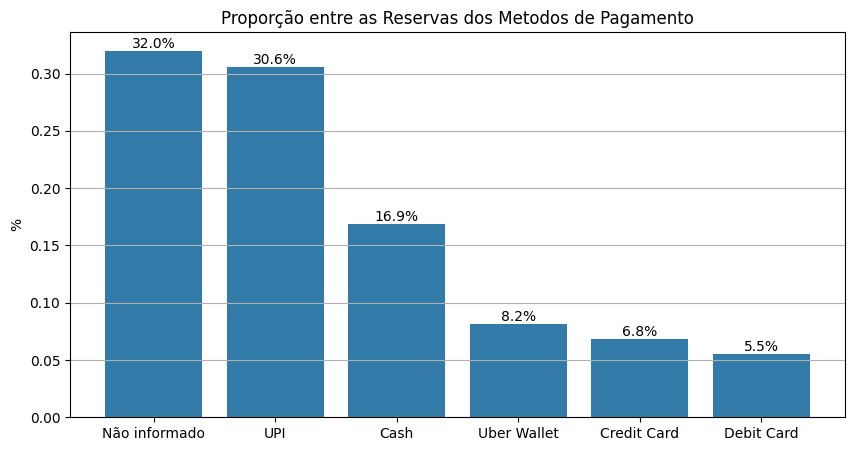

In [58]:
plt.figure(figsize=(10,5))
pagBar = plt.bar(tipo_pagamento['Método de Pagamento'], tipo_pagamento['% Reservas'],color="#327ba8")

for barra in pagBar:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f'{altura*100:.1f}%',
        ha='center',
        va='bottom'
    )
plt.ylabel('%')
plt.grid(axis='y')
plt.title('Proporção entre as Reservas dos Metodos de Pagamento')
plt.show()


  Método de Pagamento  ID da Reserva  Valor da Reserva  % Reservas   % Valor
4                 UPI          45909        23345101.0    0.306060  0.325512
3       Não informado          48000        19872000.0    0.320000  0.277085
0                Cash          25367        12895649.0    0.169113  0.179810
5         Uber Wallet          12276         6200898.0    0.081840  0.086462
1         Credit Card          10209         5224025.0    0.068060  0.072841
2          Debit Card           8239         4180510.0    0.054927  0.058291


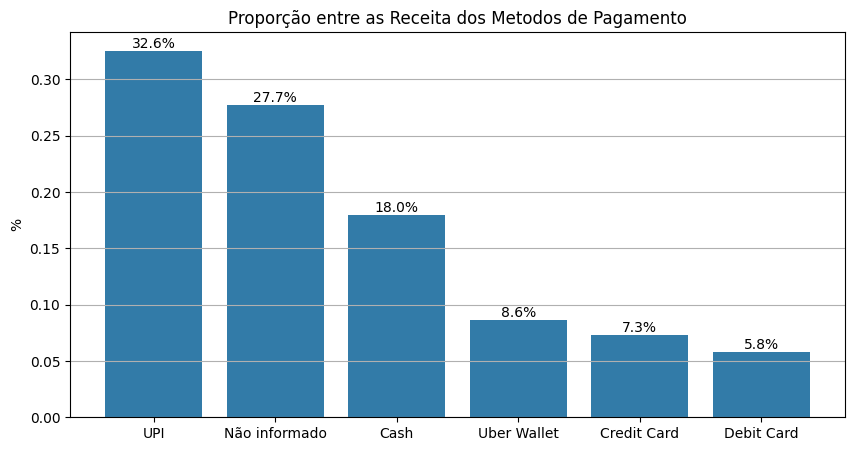

In [59]:
tipo_pagamento_ord = tipo_pagamento.sort_values(by='% Valor',ascending=False)

print(tipo_pagamento_ord)

plt.figure(figsize=(10,5))
pagBar = plt.bar(tipo_pagamento_ord['Método de Pagamento'], tipo_pagamento_ord['% Valor'],color="#327ba8")

for barra in pagBar:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f'{altura*100:.1f}%',
        ha='center',
        va='bottom'
    )
plt.ylabel('%')
plt.grid(axis='y')
plt.title('Proporção entre as Receita dos Metodos de Pagamento')
plt.show()


*Notas do Gráfico*
- Podemos verificar que **32%** das corridas não tiveram seu tipo de pagamento informado.   
- A ausencia de informações sobre o tipo de pagamento em quase um terço das corridas compromente a comfiabilidade da análise de tendencia.  

----
*Motivos da Ausencia de Metodo de Pagamento*
- As corridas que não possuem os metodos de pagamento são justamente as com estatus de  Canceladas e Motorista Não encontrado.
- A uber tem uma politica de no momento da reserva da corrida o usuario deve informar o método de pagamento.
    - Desta forma os métodos de pagamento das corridas  não estão sendo armasedos para estas ocorrencias 
    - Essa falta de informação pode distorcer a conclusão sobre preferencia de pagamentos dos usuarios e preferencias dos motoristas.

----
*Relevancia da Uber Wallet*:
- A Uber Wallet representa apenas 8,6% dos métodos de pagamento registrados, um percentual ainda tímido diante das demais opções disponíveis.
- A utilização da Uber Wallet também facilita a rastreabilidade de transações, tanto para o cliente quanto para o motorista, garantido mais segurança para ambos.  
- **Transparência para motoristas**:
    - Com créditos já disponíveis na carteira digital, o motorista pode ter maior confiança na efetivação do pagamento, o que pode aumentar a taxa de aceitação de corridas.
- **Facilidade de integração com promoções e fidelidade**:
    - A Uber pode vincular benefícios exclusivos ao uso da Wallet, como cashback, descontos ou prioridade em corridas, incentivando sua adoção.
    - Isso também pode gerar dados mais ricos sobre o comportamento do usuário, permitindo análises mais precisas e segmentadas.





### 4) Faturamento e Sasionalidade

In [60]:
rec_periodica = df_ub_2[['ID da Reserva', 'Data','Estacao','Ano', 'Mes', 'Nome_Mes','Dia', 'Dia_Semana','DOW', 'Trimestre','Valor da Reserva']].sort_values(by='Data').copy()
rec_periodica = rec_periodica.sort_values(by='Mes')
        # receita por mes
rec_mes = rec_periodica.groupby(['Mes','Nome_Mes']).agg({
    'ID da Reserva': 'count',
    'Valor da Reserva': 'sum'
}).reset_index()

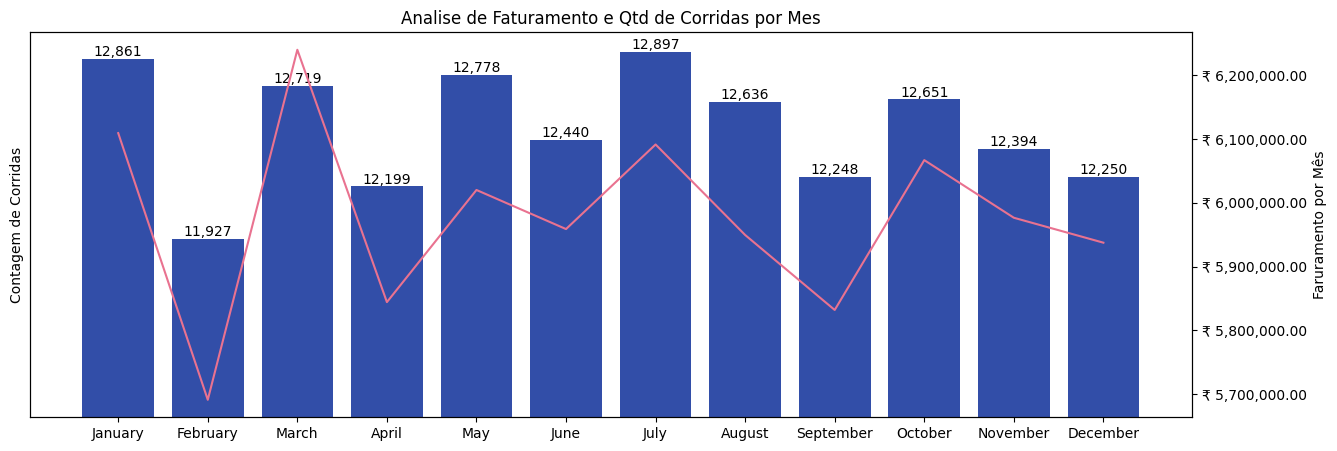

In [61]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(15,5))
rec_bar = ax.bar(rec_mes['Nome_Mes'],rec_mes['ID da Reserva'],color="#324ea8")

ax2 = ax.twinx()
rec_lin = ax2.plot(rec_mes['Nome_Mes'],rec_mes['Valor da Reserva'],color="#e97290")


for barra in rec_bar:
    altura=barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f'{altura:,}',
        ha='center',
        va='bottom'
    )

ax.set_ylim(11000,13000)
ax.set_ylabel('Contagem de Corridas')
ax.set_yticks([])


ax2.set_ylabel('Faruramento por Mês')
ax2.yaxis.set_major_formatter(formatter=mtick.StrMethodFormatter('₹ {x:,.2f}'))

plt.xticks(rotation=45)

plt.title('Analise de Faturamento e Qtd de Corridas por Mes')
plt.show()

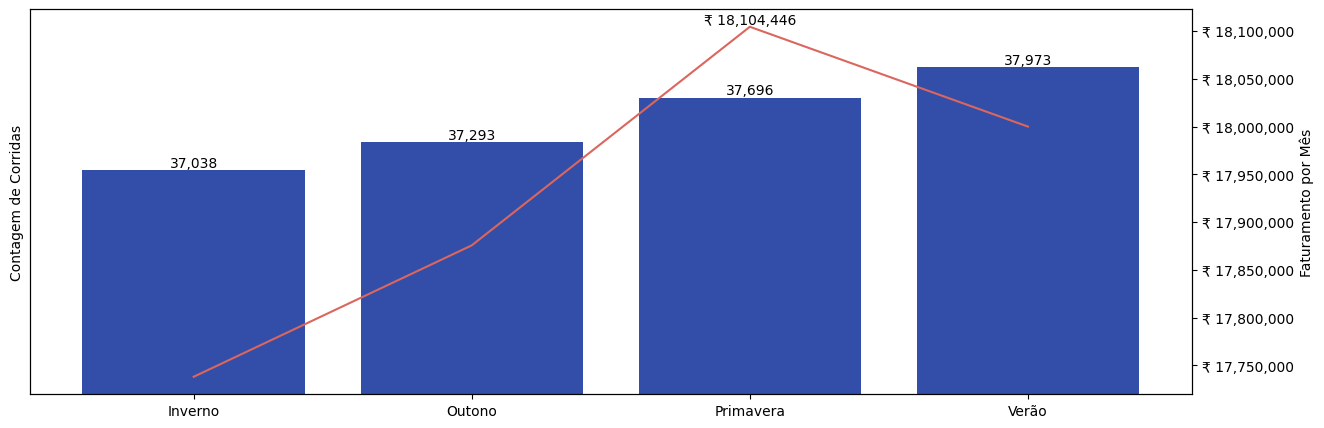

                  ID da Reserva  Valor da Reserva
ID da Reserva          1.000000          0.847294
Valor da Reserva       0.847294          1.000000


In [62]:
# receita por estacao
rec_estacao = rec_periodica.groupby('Estacao').agg({
    'ID da Reserva': 'count',
    'Valor da Reserva': 'sum'
}).reset_index()
rec_estacao = rec_estacao.sort_values(by='Estacao')

fig, ax = plt.subplots(figsize=(15,5))

fig_bar= ax.bar(rec_estacao['Estacao'],rec_estacao['ID da Reserva'],color="#324ea8")

ax2 = ax.twinx()

fig_plot = ax2.plot(rec_estacao['Estacao'],rec_estacao['Valor da Reserva'],color="#db665e")

for barras in fig_bar:
    altura = barras.get_height()
    pos_x = barras.get_x() + barras.get_width() / 2
    ax.text(
        pos_x,
        altura,
        f"{altura:,.0f}",
        ha='center',
        va='bottom'
    )

x_valor = rec_estacao['Estacao']
y_valor = rec_estacao['Valor da Reserva']

y_max = y_valor.max()
idex_x = y_valor.idxmax()
x_max = x_valor.iloc[idex_x]
ax2.text(
    x_max,
    y_max,
    f'₹ {y_max:,.0f}',
    ha='center',
    va='bottom'
)



ax.set_ylim(35000,38500)
ax.set_ylabel('Contagem de Corridas')
ax.set_yticks([])

ax2.set_ylabel('Faturamento por Mês')
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('₹ {x:,.0f}'))
plt.show()

rec_estacao_cor = rec_estacao[['ID da Reserva','Valor da Reserva']].corr()

print(rec_estacao_cor)


**Sasionalidade**
- Observa‑se ao longo do ano uma variação significativa no faturamento da plataforma, evidenciando forte influência sazonal sobre a demanda 
- O mês de março apresenta o maior faturamento e também o maior crescimento positivo. Esse comportamento está associado ao **Festival Holi**,
celebração nacional que marca a chegada da primavera.
    - Durante esse período, há um aumento expressivo na procura por hospedagens, chegando a aproximadamente cinco vezes a demanda usual, 
    conforme reportado pelo portal [Money Control](https://www.moneycontrol.com/news/technology/travel-bookings-surge-5-fold-for-holi-good-friday-holidays-temple-towns-to-see-big-rush-12464531.html)
---
- A sazonalidade das corridas também é impactada pelas condições climáticas regionais.
    - O clima indiano é caracterizado por um período central do ano quente e chuvoso, influenciado pelo regime de monções, 
    o que tende a elevar a demanda por deslocamentos.
    - Na primavera, durante o auge das monções, predominam temperaturas elevadas e maior volume de chuvas.
    - No verão, as temperaturas podem ultrapassar 40°C, intensificando ainda mais a necessidade de transporte.